In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Cargamos el dataset

In [2]:
df = pd.read_csv(r"E:\Ciencia de Datos\Segundo Parcial\set_credit_score.csv")
df.head()

C:\Users\Vespula\AppData\Local\Temp\ipykernel_1788\903672451.py:1: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r"E:\Ciencia de Datos\Segundo Parcial\set_credit_score.csv")


,Unnamed: 0,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529544,High_spent_Small_value_payments,312.4940887,Good
1,1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,...,Good,809.98,31.944960,NaN,No,49.574949,118.2802216,Low_spent_Large_value_payments,284.6291625,Good
2,2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.69952126,Low_spent_Medium_value_payments,331.2098629,Good
3,3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580744,Low_spent_Small_value_payments,223.4513097,Good
4,4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.42015309,High_spent_Medium_value_payments,341.489231,Good


# Eliminamos las columnas que no nos interesan.

In [3]:
df_2 = df.drop(columns=['Unnamed: 0', 'ID', 'Customer_ID', 'Name', 'SSN'], errors='ignore')
df_2.head()

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,January,23,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529544,High_spent_Small_value_payments,312.4940887,Good
1,February,23,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,31.944960,NaN,No,49.574949,118.2802216,Low_spent_Large_value_payments,284.6291625,Good
2,March,-500,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.69952126,Low_spent_Medium_value_payments,331.2098629,Good
3,April,23,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580744,Low_spent_Small_value_payments,223.4513097,Good
4,May,23,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.42015309,High_spent_Medium_value_payments,341.489231,Good


In [4]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Month                     100000 non-null  object 
 1   Age                       100000 non-null  object 
 2   Occupation                100000 non-null  object 
 3   Annual_Income             100000 non-null  object 
 4   Monthly_Inhand_Salary     84998 non-null   float64
 5   Num_Bank_Accounts         100000 non-null  int64  
 6   Num_Credit_Card           100000 non-null  int64  
 7   Interest_Rate             100000 non-null  int64  
 8   Num_of_Loan               100000 non-null  object 
 9   Type_of_Loan              88592 non-null   object 
 10  Delay_from_due_date       100000 non-null  int64  
 11  Num_of_Delayed_Payment    92998 non-null   object 
 12  Changed_Credit_Limit      100000 non-null  object 
 13  Num_Credit_Inquiries      98035 non-null   fl

In [5]:
# Mostrar solo las columnas categóricas de df_2
cat_cols = df_2.select_dtypes(include=['object']).columns

# Mostrar los valores únicos de cada columna categórica
for col in cat_cols:
	print(f"Columna: {col}")
	print(df_2[col].unique())
	print("-" * 40)

Columna: Month
['January' 'February' 'March' 'April' 'May' 'June' 'July' 'August']
----------------------------------------
Columna: Age
['23' '-500' '28_' ... '4808_' '2263' '1342']
----------------------------------------
Columna: Occupation
['Scientist' '_______' 'Teacher' 'Engineer' 'Entrepreneur' 'Developer'
 'Lawyer' 'Media_Manager' 'Doctor' 'Journalist' 'Manager' 'Accountant'
 'Musician' 'Mechanic' 'Writer' 'Architect']
----------------------------------------
Columna: Annual_Income
['19114.12' '34847.84' '34847.84_' ... '20002.88' '39628.99' '39628.99_']
----------------------------------------
Columna: Num_of_Loan
['4' '1' '3' '967' '-100' '0' '0_' '2' '3_' '2_' '7' '5' '5_' '6' '8' '8_'
 '9' '9_' '4_' '7_' '1_' '1464' '6_' '622' '352' '472' '1017' '945' '146'
 '563' '341' '444' '720' '1485' '49' '737' '1106' '466' '728' '313' '843'
 '597_' '617' '119' '663' '640' '92_' '1019' '501' '1302' '39' '716' '848'
 '931' '1214' '186' '424' '1001' '1110' '1152' '457' '1433' '1187' '52'

In [6]:
# Muestra columnas numéricas, sus valores únicos y la cantidad de valores que contienen '_'  
cols = ['Monthly_Balance','Amount_invested_monthly','Changed_Credit_Limit', 'Outstanding_Debt','Num_of_Delayed_Payment', 'Annual_Income', 'Age','Num_of_Loan']

for col in cols:
    print(f"Columna: {col}")
    print("Valores únicos:", df_2[col].nunique())
    print("Cantidad de valores con '_':", df_2[col].astype(str).str.contains('_').sum())
    print("Primeros valores únicos:", df_2[col].unique()[:10])
    print("-" * 40)

Columna: Monthly_Balance
Valores únicos: 98790
Cantidad de valores con '_': 9
Primeros valores únicos: ['312.4940887' '284.6291625' '331.2098629' '223.4513097' '341.489231'
 '340.4792118' '244.5653167' '358.1241676' '470.6906269' '484.5912143']
----------------------------------------
Columna: Amount_invested_monthly
Valores únicos: 91049
Cantidad de valores con '_': 4305
Primeros valores únicos: ['80.41529544' '118.2802216' '81.69952126' '199.4580744' '41.42015309'
 '62.43017233' '178.3440674' '24.78521651' '104.2918252' '40.39123783']
----------------------------------------
Columna: Changed_Credit_Limit
Valores únicos: 3635
Cantidad de valores con '_': 2091
Primeros valores únicos: ['11.27' '_' '6.27' '9.27' '5.42' '7.42' '6.42' '7.1' '11.1' '9.1']
----------------------------------------
Columna: Outstanding_Debt
Valores únicos: 13178
Cantidad de valores con '_': 1009
Primeros valores únicos: ['809.98' '605.03' '1303.01' '632.46' '943.86' '548.2' '352.16' '1704.18'
 '1377.74' '421.

In [7]:
# Copia de df_2 para df_3 antes de la corrección
df_3 = df_2.copy()

# Corrección de datos
for col in cols:
    # Elimina el carácter '_' y convierte a número (NaN si no se puede convertir)
    df_3[col] = df_2[col].astype(str).str.replace('_', '', regex=False)
    df_3[col] = pd.to_numeric(df_3[col], errors='coerce')


# Verificación de la corrección
for col in cols:
    print(f"Columna: {col}")
    print("Valores únicos:", df_3[col].nunique())
    print("Cantidad de valores con '_':", df_3[col].astype(str).str.contains('_').sum())
    print("Primeros valores únicos:", df_3[col].unique()[:10])
    print("-" * 40)

Columna: Monthly_Balance
Valores únicos: 98790
Cantidad de valores con '_': 0
Primeros valores únicos: [312.4940887 284.6291625 331.2098629 223.4513097 341.489231  340.4792118
 244.5653167 358.1241676 470.6906269 484.5912143]
----------------------------------------
Columna: Amount_invested_monthly
Valores únicos: 91049
Cantidad de valores con '_': 0
Primeros valores únicos: [ 80.41529544 118.2802216   81.69952126 199.4580744   41.42015309
  62.43017233 178.3440674   24.78521651 104.2918252   40.39123783]
----------------------------------------
Columna: Changed_Credit_Limit
Valores únicos: 3634
Cantidad de valores con '_': 0
Primeros valores únicos: [11.27   nan  6.27  9.27  5.42  7.42  6.42  7.1  11.1   9.1 ]
----------------------------------------
Columna: Outstanding_Debt
Valores únicos: 12203
Cantidad de valores con '_': 0
Primeros valores únicos: [ 809.98  605.03 1303.01  632.46  943.86  548.2   352.16 1704.18 1377.74
  421.43]
----------------------------------------
Columna: N

In [8]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Month                     100000 non-null  object 
 1   Age                       100000 non-null  int64  
 2   Occupation                100000 non-null  object 
 3   Annual_Income             100000 non-null  float64
 4   Monthly_Inhand_Salary     84998 non-null   float64
 5   Num_Bank_Accounts         100000 non-null  int64  
 6   Num_Credit_Card           100000 non-null  int64  
 7   Interest_Rate             100000 non-null  int64  
 8   Num_of_Loan               100000 non-null  int64  
 9   Type_of_Loan              88592 non-null   object 
 10  Delay_from_due_date       100000 non-null  int64  
 11  Num_of_Delayed_Payment    92998 non-null   float64
 12  Changed_Credit_Limit      97909 non-null   float64
 13  Num_Credit_Inquiries      98035 non-null   fl

#### Se identifican los valores nulos. Si la variable es categórica, se reemplazan por la moda; si es numérica, por la mediana.

In [9]:
# Identifico columnas categóricas y numéricas
cat_cols = df_3.select_dtypes(include=['object']).columns
num_cols = df_3.select_dtypes(include=[np.number]).columns

# Reemplazo nulos: moda para categóricas, mediana para numéricas
for col in df_3.columns:
    if df_3[col].isnull().sum() > 0:
        if col in cat_cols:
            df_3[col] = df_3[col].fillna(df_3[col].mode()[0])
        elif col in num_cols:
            df_3[col] = df_3[col].fillna(df_3[col].median())

# Verifico que no queden nulos
print(df_3.isnull().sum())

Month                       0
Age                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64


In [10]:
# Eliminar outliers por IQR en todas las columnas numéricas
def remove_outliers_iqr(df, num_cols):
    df_clean = df.copy()
    for col in num_cols:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        # Filtra los valores dentro del rango IQR
        df_clean = df_clean[(df_clean[col] >= lower) & (df_clean[col] <= upper)]
    return df_clean

df_4 = remove_outliers_iqr(df_3, num_cols)
print(f"Shape original: {df_3.shape}")
print(f"Shape sin outliers: {df_4.shape}")

Shape original: (100000, 24)
Shape sin outliers: (56312, 24)


In [11]:
print(df_4['Month'].value_counts())
print(df_4['Month'].unique())

Month
February    7144
January     7084
March       7072
May         7032
June        7026
April       7024
July        6996
August      6934
Name: count, dtype: int64
['January' 'February' 'April' 'May' 'June' 'July' 'August' 'March']


In [12]:
print("Filas duplicadas:", df_4.duplicated().sum())

Filas duplicadas: 0


### Observación sobre la variable `Month`

Al analizar la distribución de la variable categórica `Month`, se observa que la cantidad de registros es prácticamente igual para cada mes del año. Lo cual es poco común en datos reales.

**Implicancia:**  
Debido a esta falta de variabilidad, la variable `Month` probablemente no aportará información relevante para los modelos predictivos, ya que no discrimina entre clases ni refleja patrones temporales reales. Por lo tanto, excluirla del modelado o, al menos, no darle peso en el análisis de importancia de variables.


In [13]:
# Mostrar los valores únicos de cada columna categórica en df_4
for col in cat_cols:
    print(f"Columna: {col}")
    print(df_4[col].unique())
    print("-" * 40)

Columna: Month
['January' 'February' 'April' 'May' 'June' 'July' 'August' 'March']
----------------------------------------
Columna: Occupation
['Scientist' '_______' 'Teacher' 'Entrepreneur' 'Developer' 'Lawyer'
 'Media_Manager' 'Journalist' 'Engineer' 'Manager' 'Musician' 'Mechanic'
 'Writer' 'Accountant' 'Architect' 'Doctor']
----------------------------------------
Columna: Type_of_Loan
['Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan'
 'Credit-Builder Loan' 'Not Specified' ...
 'Home Equity Loan, Auto Loan, Auto Loan, and Auto Loan'
 'Payday Loan, Student Loan, Mortgage Loan, and Not Specified'
 'Personal Loan, Auto Loan, Mortgage Loan, Student Loan, and Student Loan']
----------------------------------------
Columna: Credit_Mix
['_' 'Good' 'Standard' 'Bad']
----------------------------------------
Columna: Credit_History_Age
['22 Years and 1 Months' '15 Years and 11 Months' '22 Years and 4 Months'
 '22 Years and 5 Months' '22 Years and 6 Months' '22 Years and

#### Seguimos limpiamdo el data set:
### Resumen de la limpieza de variables categóricas

Durante el análisis exploratorio se detectaron valores atípicos o no informativos en varias columnas categóricas:

- **Occupation:** Se encontró el valor `'_______'`, que representa datos faltantes o no informados.
- **Credit_Mix:** Se detectó el valor `'_'`, que no corresponde a ninguna categoría válida.
- **Payment_Behaviour:** Apareció el valor `'!@9#%8'`, que es un error o dato corrupto.

In [14]:
df_5 = df_4.copy()

# Reemplazar valores no informativos o erróneos por NaN en df_5
df_5['Occupation'] = df_5['Occupation'].replace('_______', np.nan)
df_5['Credit_Mix'] = df_5['Credit_Mix'].replace('_', np.nan)
df_5['Payment_Behaviour'] = df_5['Payment_Behaviour'].replace('!@9#%8', np.nan)

# Rellenar con la moda de cada columna en df_5
df_5['Occupation'] = df_5['Occupation'].fillna(df_5['Occupation'].mode()[0])
df_5['Credit_Mix'] = df_5['Credit_Mix'].fillna(df_5['Credit_Mix'].mode()[0])
df_5['Payment_Behaviour'] = df_5['Payment_Behaviour'].fillna(df_5['Payment_Behaviour'].mode()[0])

#### Type_of_Loan

In [15]:
print("Cantidad de opciones únicas en Type_of_Loan:", df_5['Type_of_Loan'].nunique())

Cantidad de opciones únicas en Type_of_Loan: 4926


In [16]:
# Frecuencia de cada valor en Type_of_Loan
print(df_5['Type_of_Loan'].value_counts())

Type_of_Loan
Not Specified                                                                                                                                              6570
Personal Loan                                                                                                                                               720
Debt Consolidation Loan                                                                                                                                     687
Credit-Builder Loan                                                                                                                                         675
Student Loan                                                                                                                                                672
                                                                                                                                                           ... 
Not Specified, Mortgage Loa

In [17]:
# Mostrar las primeras n filas de Type_of_Loan        
print(df_5['Type_of_Loan'].value_counts().head(100))

Type_of_Loan
Not Specified                                                     6570
Personal Loan                                                      720
Debt Consolidation Loan                                            687
Credit-Builder Loan                                                675
Student Loan                                                       672
                                                                  ... 
Credit-Builder Loan, Personal Loan, and Mortgage Loan               40
Credit-Builder Loan, Home Equity Loan, and Credit-Builder Loan      38
Not Specified, Debt Consolidation Loan, and Not Specified           37
Payday Loan, Home Equity Loan, and Debt Consolidation Loan          37
Not Specified, Home Equity Loan, and Home Equity Loan               37
Name: count, Length: 100, dtype: int64


In [18]:
df_6 = df_5.copy()

# Agrupar categorías poco frecuentes en 'Otros', pero dejar 'Not Specified' como categoría propia
frecuencias = df_6['Type_of_Loan'].value_counts()
# Incluye 'Not Specified' siempre, aunque tenga menos de 100 registros
categorias_significativas = list(frecuencias[frecuencias >= 100].index) + ['Not Specified']
df_6['Type_of_Loan'] = df_6['Type_of_Loan'].where(df_6['Type_of_Loan'].isin(categorias_significativas), 'Otros')

# Verifica el resultado
print(df_6['Type_of_Loan'].value_counts())

Type_of_Loan
Otros                                         36261
Not Specified                                  6570
Personal Loan                                   720
Debt Consolidation Loan                         687
Credit-Builder Loan                             675
                                              ...  
Mortgage Loan, and Credit-Builder Loan          105
Payday Loan, and Not Specified                  104
Debt Consolidation Loan, and Student Loan       102
Debt Consolidation Loan, and Mortgage Loan      101
Student Loan, and Mortgage Loan                 100
Name: count, Length: 76, dtype: int64


#### Payment_of_Min_Amount

In [19]:
print(df_6['Payment_of_Min_Amount'].value_counts())

Payment_of_Min_Amount
Yes    30198
No     19440
NM      6674
Name: count, dtype: int64


###### T|iene una frecuencia de 6674 datos 'NM'. La conservamos, y no la sumamos a 'No'.

#### Credit_History_Age

In [20]:
# Extraer años y meses como variables numéricas
df_6['Credit_History_Years'] = df_6['Credit_History_Age'].str.extract(r'(\d+) Years').astype(float)
df_6['Credit_History_Months'] = df_6['Credit_History_Age'].str.extract(r'(\d+) Months').astype(float)

# Calcular la antigüedad total en años (años + meses/12)
df_6['Credit_History_Total_Years'] = df_6['Credit_History_Years'] + (df_6['Credit_History_Months'] / 12)

# Verifica el resultado
print(df_6[['Credit_History_Age', 'Credit_History_Years', 'Credit_History_Months', 'Credit_History_Total_Years']].head())

       Credit_History_Age  Credit_History_Years  Credit_History_Months  \
0   22 Years and 1 Months                  22.0                    1.0   
1  15 Years and 11 Months                  15.0                   11.0   
3   22 Years and 4 Months                  22.0                    4.0   
4   22 Years and 5 Months                  22.0                    5.0   
5   22 Years and 6 Months                  22.0                    6.0   

   Credit_History_Total_Years  
0                   22.083333  
1                   15.916667  
3                   22.333333  
4                   22.416667  
5                   22.500000  


In [21]:
# Redondear a 5 cifras significativas y reemplazar la columna original
df_6['Credit_History_Age'] = df_6['Credit_History_Total_Years'].apply(lambda x: float(f"{x:.5g}"))

# Eliminar las columnas auxiliares
df_6 = df_6.drop(columns=['Credit_History_Years', 'Credit_History_Months', 'Credit_History_Total_Years'])

# Crear el nuevo DataFrame limpio
df_7 = df_6.copy()

print(df_7['Credit_History_Age'].head())

0    22.083
1    15.917
3    22.333
4    22.417
5    22.500
Name: Credit_History_Age, dtype: float64


###### Converti "Credit_History_Age" a numerica, sumando los años y meses. 

### Pasamos las variables objetc a categoricas. 

In [22]:
for col in df_7.select_dtypes(include='object').columns:
    df_7[col] = df_7[col].astype('category')

### Categóricas Ordinales

In [23]:
print(df_7['Credit_Mix'].unique())
print(df_7['Credit_Score'].unique())

['Standard', 'Good', 'Bad']
Categories (3, object): ['Bad', 'Good', 'Standard']
['Good', 'Standard', 'Poor']
Categories (3, object): ['Good', 'Poor', 'Standard']


In [24]:
# Codificación ordinal para Credit_Mix y Credit_Score (reemplazando las columnas originales)
credit_mix_map = {'Bad': 0, 'Standard': 1, 'Good': 2}
df_7['Credit_Mix'] = df_7['Credit_Mix'].map(credit_mix_map)

credit_score_map = {'Poor': 0, 'Standard': 1, 'Good': 2}
df_7['Credit_Score'] = df_7['Credit_Score'].map(credit_score_map)

print(df_7['Credit_Mix'].unique())
print(df_7['Credit_Score'].unique())

[1, 2, 0]
Categories (3, int64): [0, 2, 1]
[2, 1, 0]
Categories (3, int64): [2, 0, 1]


In [25]:
df_7 = df_7.reset_index(drop=True)

### Categóricas Nominales

In [29]:
# Identificar variables nominales (categóricas tipo 'category' que no son ordinales)
nominales = df_7.select_dtypes(include='category').columns.difference(['Credit_Mix', 'Credit_Score'])
print("Variables nominales:", list(nominales))

# Aplicar one-hot encoding solo a las nominales
df_7 = pd.get_dummies(df_7, columns=nominales, drop_first=True)

Variables nominales: ['Month', 'Occupation', 'Payment_Behaviour', 'Payment_of_Min_Amount', 'Type_of_Loan']


#### *Eliminación de la variable Month:*

La variable Month presenta una distribución muy homogénea, es decir, la frecuencia de registros es similar para cada mes. Esto indica que no existe estacionalidad ni patrones temporales relevantes para la clasificación del score crediticio en este dataset.

Se elimina la variable Month del análisis, ya que no aporta información predictiva y solo agregaría ruido o dimensionalidad innecesaria al modelo.

In [40]:
df_final = df_7.drop('Month', axis=1, errors='ignore')

# Separar variables predictoras y objetivo

In [59]:
# Separar variables predictoras y objetivo
X = df_final.drop('Credit_Score', axis=1)
y = df_final['Credit_Score']

# Dividir en entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape X_train:", X_train.shape)
print("Shape X_test:", X_test.shape)
print("Shape y_train:", y_train.shape)
print("Shape y_test:", y_test.shape)

Shape X_train: (45049, 121)
Shape X_test: (11263, 121)
Shape y_train: (45049,)
Shape y_test: (11263,)


##### Estandarizacion de los subconjuntos.

In [60]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### Búsqueda de modelo mas preciso y su hiperparametros.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Árbol de Decisión: búsqueda de mejores hiperparámetros
param_grid_dt = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10]
}
grid_dt = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid_dt, cv=5, scoring='accuracy')
grid_dt.fit(X_train, y_train)
print("Mejor Árbol de Decisión:", grid_dt.best_params_)
print("Precisión validación cruzada:", grid_dt.best_score_)

# Random Forest: búsqueda de mejores hiperparámetros
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5]
}
grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, scoring='accuracy')
grid_rf.fit(X_train, y_train)
print("Mejor Random Forest:", grid_rf.best_params_)
print("Precisión validación cruzada:", grid_rf.best_score_)

# KNN: búsqueda de mejores hiperparámetros (usa datos escalados)
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # 1=Manhattan, 2=Euclidiana
}
grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5, scoring='accuracy')
grid_knn.fit(X_train_scaled, y_train)
print("Mejor KNN:", grid_knn.best_params_)
print("Precisión validación cruzada:", grid_knn.best_score_)

# Diccionario para mapear los resultados
score_labels = {0: 'Poor', 1: 'Standard', 2: 'Good'}

# Función para mapear arrays de resultados
def map_labels(arr):
    return [score_labels[x] for x in arr]

# Evaluación en test con nombres legibles
y_pred_dt = grid_dt.predict(X_test)
y_pred_rf = grid_rf.predict(X_test)
y_pred_knn = grid_knn.predict(X_test_scaled)
print("Árbol de Decisión (mejorado):\n", classification_report(map_labels(y_test), map_labels(y_pred_dt)))
print("Random Forest (mejorado):\n", classification_report(map_labels(y_test), map_labels(y_pred_rf)))
print("KNN (mejorado):\n", classification_report(map_labels(y_test), map_labels(y_pred_knn)))

Mejor Árbol de Decisión: {'max_depth': 10, 'min_samples_split': 5}
Precisión validación cruzada: 0.7296500712260979


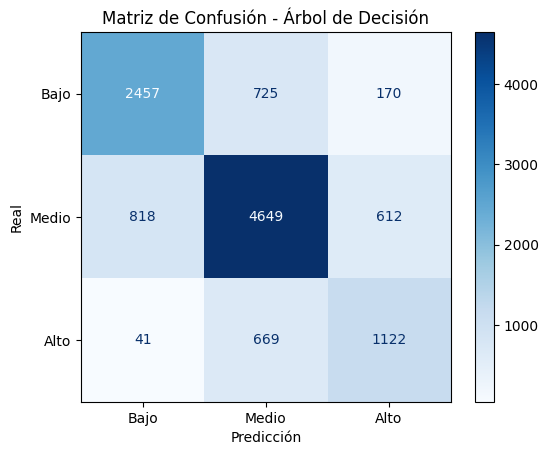

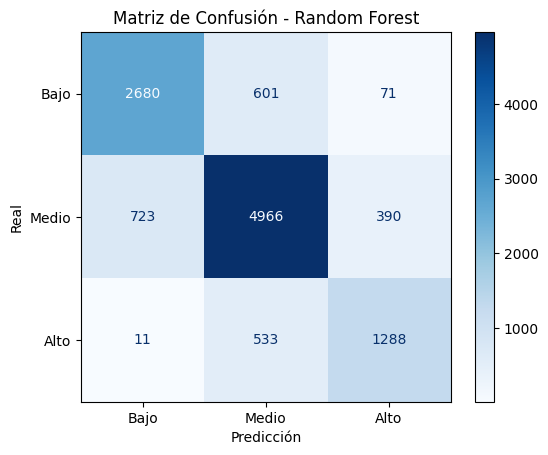

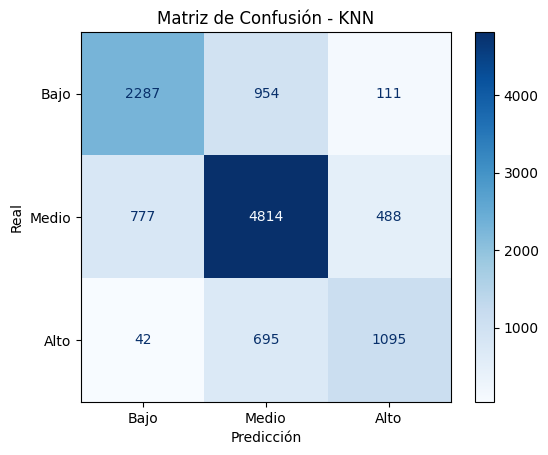

In [ ]:
score_labels = {0: 'Bajo', 1: 'Medio', 2: 'Alto'}


def map_labels(arr):
    return [score_labels[x] for x in arr]

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Árbol de Decisión
cm_dt = confusion_matrix(map_labels(y_test), map_labels(y_pred_dt), labels=list(score_labels.values()))
disp_dt = ConfusionMatrixDisplay(confusion_matrix=cm_dt, display_labels=list(score_labels.values()))
disp_dt.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusión - Árbol de Decisión")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

# Random Forest
cm_rf = confusion_matrix(map_labels(y_test), map_labels(y_pred_rf), labels=list(score_labels.values()))
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=list(score_labels.values()))
disp_rf.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusión - Random Forest")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

# KNN
cm_knn = confusion_matrix(map_labels(y_test), map_labels(y_pred_knn), labels=list(score_labels.values()))
disp_knn = ConfusionMatrixDisplay(confusion_matrix=cm_knn, display_labels=list(score_labels.values()))
disp_knn.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusión - KNN")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

# Guardar el DataFrame final
df_final.to_csv(r"E:\Ciencia de Datos\Segundo Parcial\set_credit_score_ramior_ottone_villar.csv", index=False)

## *Conclusiones y selección del mejor modelo*
Para abordar el problema de clasificación del score crediticio, se probaron tres modelos: Árbol de Decisión, Random Forest y KNN, utilizando validación cruzada y búsqueda de hiperparámetros para maximizar la precisión.
El proceso incluyó la limpieza de datos, tratamiento de valores nulos y outliers, transformación de variables categóricas y estandarización de los datos.

Tras comparar los resultados de precisión, recall y F1-score en el conjunto de prueba, el modelo más preciso fue Random Forest con los siguientes hiperparámetros óptimos:

n_estimators: 100

max_depth: 10

min_samples_split: 2


#### La elección de Random Forest se justifica porque:

Obtuvo la mayor precisión y métricas equilibradas en validación cruzada y en el conjunto de prueba.
Es robusto frente a outliers y variables irrelevantes.
Reduce el riesgo de sobreajuste respecto a un solo árbol de decisión, ya que combina múltiples árboles y promedia sus resultados.
Estos hiperparámetros fueron seleccionados porque permitieron al modelo generalizar mejor, evitando tanto el sobreajuste (modelos muy complejos) como el subajuste (modelos demasiado simples).
Por lo tanto, el modelo Random Forest con estos parámetros es el más adecuado para predecir el score crediticio de futuras observaciones en este conjunto de datos.

In [ ]:
from sklearn.utils import resample
from sklearn.metrics import accuracy_score
import numpy as np

def bootstrap_grid_search(model_class, param_grid, X_train, y_train, X_test, y_test, n_iterations=30):
    from itertools import product
    best_score = -np.inf
    best_params = None
    all_scores = []
    keys, values = zip(*param_grid.items())
    for v in product(*values):
        params = dict(zip(keys, v))
        scores = []
        for i in range(n_iterations):
            X_res, y_res = resample(X_train, y_train, replace=True, random_state=42+i)
            # Solo agrega random_state si el modelo lo soporta
            if 'random_state' in model_class().get_params():
                model = model_class(**params, random_state=42)
            else:
                model = model_class(**params)
            model.fit(X_res, y_res)
            y_pred = model.predict(X_test)
            scores.append(accuracy_score(y_test, y_pred))
        mean_score = np.mean(scores)
        all_scores.append((params, mean_score))
        if mean_score > best_score:
            best_score = mean_score
            best_params = params
        print(f"Parámetros: {params}, Precisión promedio bootstrap: {mean_score:.4f}")
    print(f"\nMejores parámetros: {best_params}, Precisión promedio: {best_score:.4f}")
    return best_params, best_score, all_scores

# Ejemplo para Random Forest
param_grid_rf = {
    'n_estimators': [50, 100],
    'max_depth': [5, 10],
    'min_samples_split': [2, 5]
}
best_params_rf, best_score_rf, all_scores_rf = bootstrap_grid_search(
    RandomForestClassifier, param_grid_rf, X_train, y_train, X_test, y_test
)

# Ejemplo para Árbol de Decisión
param_grid_dt = {
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5]
}
best_params_dt, best_score_dt, all_scores_dt = bootstrap_grid_search(
    DecisionTreeClassifier, param_grid_dt, X_train, y_train, X_test, y_test
)

# Ejemplo para KNN (usa datos escalados)
param_grid_knn = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}
best_params_knn, best_score_knn, all_scores_knn = bootstrap_grid_search(
    KNeighborsClassifier, param_grid_knn, X_train_scaled, y_train, X_test_scaled, y_test
)

Parámetros: {'n_estimators': 50, 'max_depth': 5, 'min_samples_split': 2}, Precisión promedio bootstrap: 0.6696
Parámetros: {'n_estimators': 50, 'max_depth': 5, 'min_samples_split': 5}, Precisión promedio bootstrap: 0.6698
Parámetros: {'n_estimators': 50, 'max_depth': 10, 'min_samples_split': 2}, Precisión promedio bootstrap: 0.7140
Parámetros: {'n_estimators': 50, 'max_depth': 10, 'min_samples_split': 5}, Precisión promedio bootstrap: 0.7148
Parámetros: {'n_estimators': 100, 'max_depth': 5, 'min_samples_split': 2}, Precisión promedio bootstrap: 0.6710
Parámetros: {'n_estimators': 100, 'max_depth': 5, 'min_samples_split': 5}, Precisión promedio bootstrap: 0.6711
Parámetros: {'n_estimators': 100, 'max_depth': 10, 'min_samples_split': 2}, Precisión promedio bootstrap: 0.7166
Parámetros: {'n_estimators': 100, 'max_depth': 10, 'min_samples_split': 5}, Precisión promedio bootstrap: 0.7170

Mejores parámetros: {'n_estimators': 100, 'max_depth': 10, 'min_samples_split': 5}, Precisión promedio:

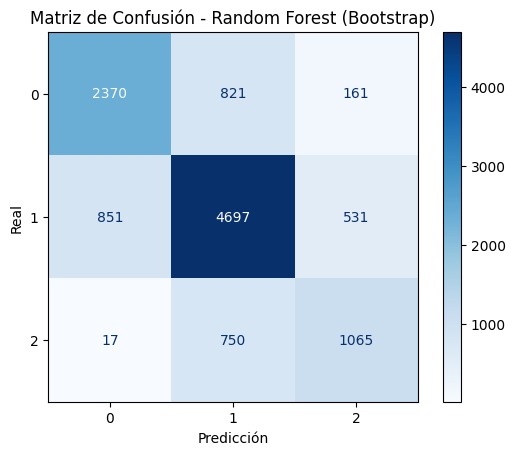

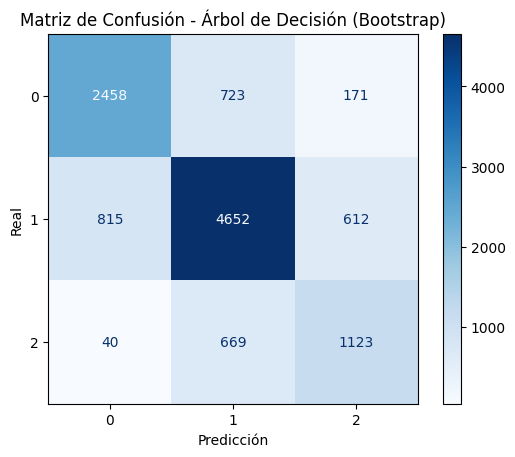

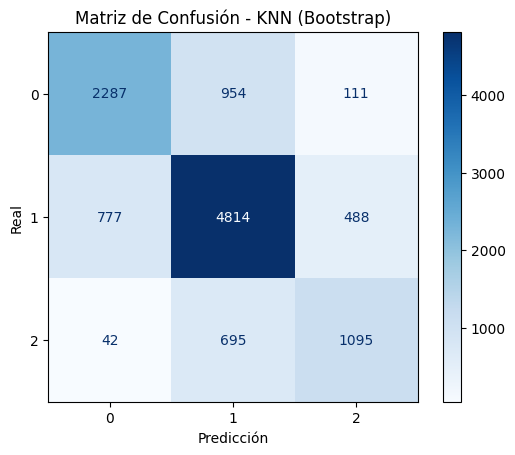

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# 1. Random Forest (usa los mejores hiperparámetros encontrados)
rf_bootstrap = RandomForestClassifier(
    n_estimators=best_params_rf['n_estimators'],
    max_depth=best_params_rf['max_depth'],
    min_samples_split=best_params_rf['min_samples_split'],
    random_state=42
)
rf_bootstrap.fit(X_train, y_train)
y_pred_rf_bootstrap = rf_bootstrap.predict(X_test)

cm_rf_bootstrap = confusion_matrix(y_test, y_pred_rf_bootstrap)
disp_rf_bootstrap = ConfusionMatrixDisplay(confusion_matrix=cm_rf_bootstrap)
disp_rf_bootstrap.plot(cmap=plt.cm.Blues)
display_labels=['Bajo', 'Medio', 'Alto']
plt.title("Matriz de Confusión - Random Forest (Bootstrap)")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

# 2. Árbol de Decisión
dt_bootstrap = DecisionTreeClassifier(
    max_depth=best_params_dt['max_depth'],
    min_samples_split=best_params_dt['min_samples_split'],
    random_state=42
)
dt_bootstrap.fit(X_train, y_train)
y_pred_dt_bootstrap = dt_bootstrap.predict(X_test)

cm_dt_bootstrap = confusion_matrix(y_test, y_pred_dt_bootstrap)
disp_dt_bootstrap = ConfusionMatrixDisplay(confusion_matrix=cm_dt_bootstrap)
disp_dt_bootstrap.plot(cmap=plt.cm.Blues)
display_labels=['Bajo', 'Medio', 'Alto']
plt.title("Matriz de Confusión - Árbol de Decisión (Bootstrap)")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

# 3. KNN (usa datos escalados)
knn_bootstrap = KNeighborsClassifier(
    n_neighbors=best_params_knn['n_neighbors'],
    weights=best_params_knn['weights'],
    p=best_params_knn['p']
)
knn_bootstrap.fit(X_train_scaled, y_train)
y_pred_knn_bootstrap = knn_bootstrap.predict(X_test_scaled)

cm_knn_bootstrap = confusion_matrix(y_test, y_pred_knn_bootstrap)
disp_knn_bootstrap = ConfusionMatrixDisplay(confusion_matrix=cm_knn_bootstrap)
disp_knn_bootstrap.plot(cmap=plt.cm.Blues)
display_labels=['Bajo', 'Medio', 'Alto']
plt.title("Matriz de Confusión - KNN (Bootstrap)")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

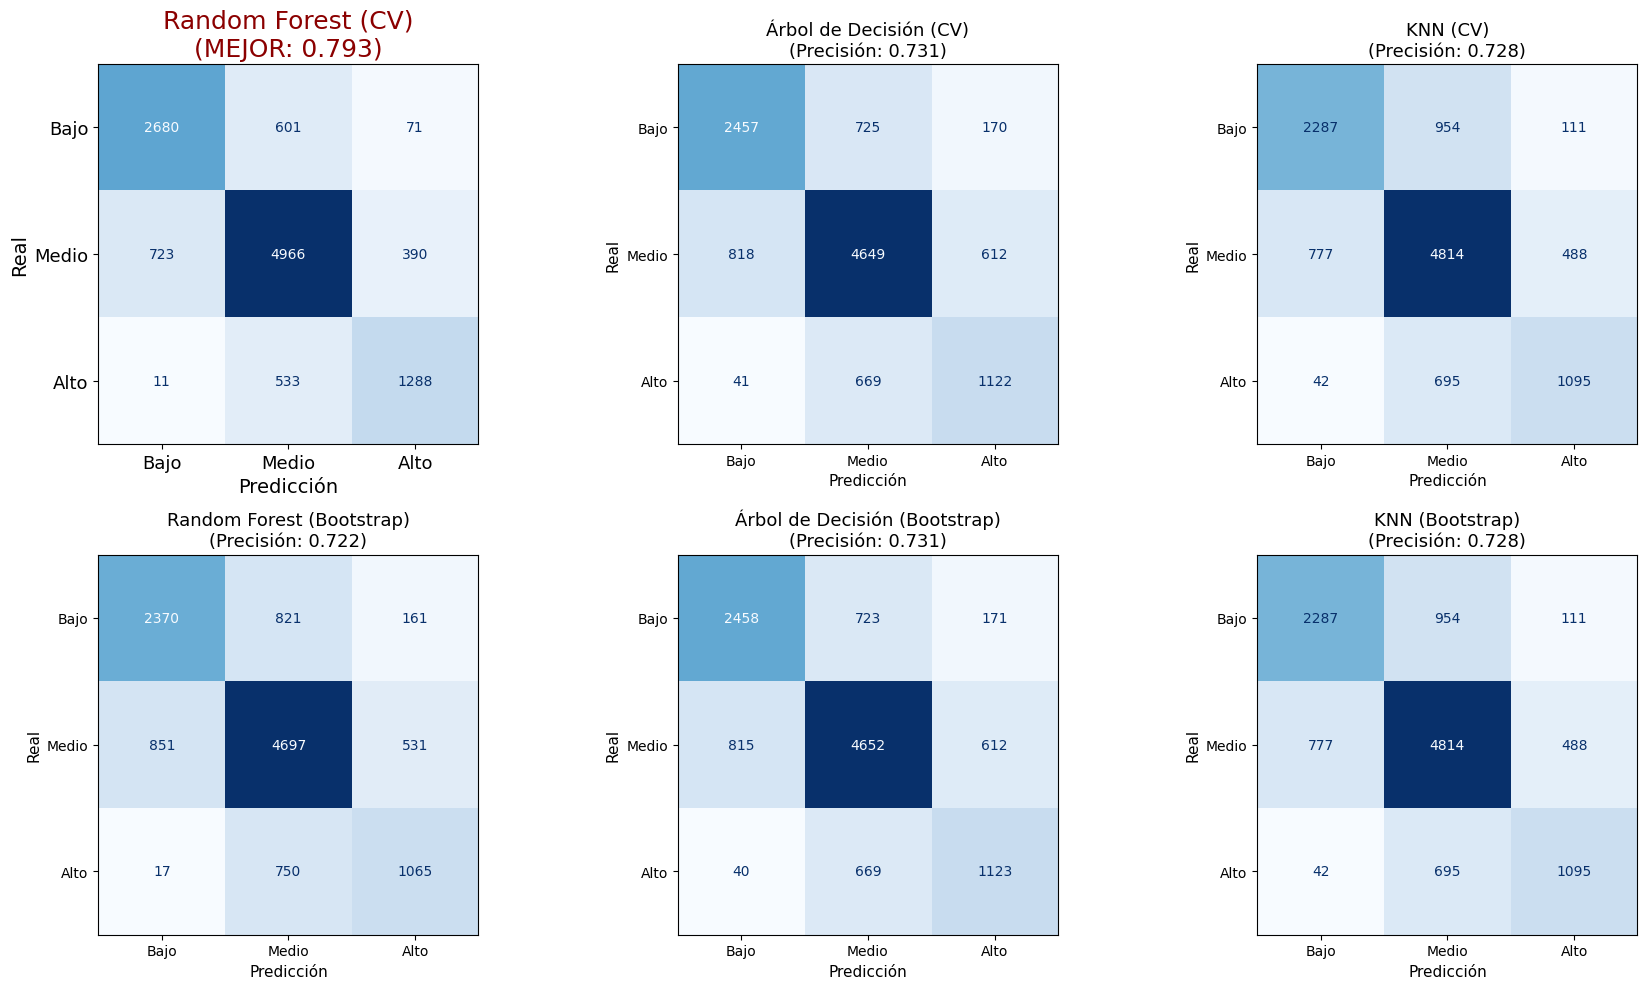

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import matplotlib.pyplot as plt

# Etiquetas
display_labels = ['Bajo', 'Medio', 'Alto']

# Precisión de cada modelo
accs = [
    accuracy_score(y_test, y_pred_rf),           # 0: RF CV
    accuracy_score(y_test, y_pred_dt),           # 1: DT CV
    accuracy_score(y_test, y_pred_knn),          # 2: KNN CV
    accuracy_score(y_test, y_pred_rf_bootstrap), # 3: RF Boot
    accuracy_score(y_test, y_pred_dt_bootstrap), # 4: DT Boot
    accuracy_score(y_test, y_pred_knn_bootstrap) # 5: KNN Boot
]
names = [
    "Random Forest (CV)",
    "Árbol de Decisión (CV)",
    "KNN (CV)",
    "Random Forest (Bootstrap)",
    "Árbol de Decisión (Bootstrap)",
    "KNN (Bootstrap)"
]
y_preds = [
    y_pred_rf, y_pred_dt, y_pred_knn,
    y_pred_rf_bootstrap, y_pred_dt_bootstrap, y_pred_knn_bootstrap
]

# Encuentra el índice de la mejor precisión
best_idx = accs.index(max(accs))

# Grilla: 2 filas x 3 columnas
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for i, (ax, name, y_pred, acc) in enumerate(zip(axes, names, y_preds, accs)):
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=display_labels)
    if i == best_idx:
        disp.plot(ax=ax, cmap=plt.cm.Blues, colorbar=False)
        ax.set_title(f"{name}\n(MEJOR: {acc:.3f})", fontsize=18, color='darkred')
        ax.xaxis.label.set_size(14)
        ax.yaxis.label.set_size(14)
        for label in (ax.get_xticklabels() + ax.get_yticklabels()):
            label.set_fontsize(13)
    else:
        disp.plot(ax=ax, cmap=plt.cm.Blues, colorbar=False)
        ax.set_title(f"{name}\n(Precisión: {acc:.3f})", fontsize=13)
        ax.xaxis.label.set_size(11)
        ax.yaxis.label.set_size(11)
        for label in (ax.get_xticklabels() + ax.get_yticklabels()):
            label.set_fontsize(10)
    ax.set_xlabel("Predicción")
    ax.set_ylabel("Real")

plt.tight_layout()
plt.show()

## **Conclusión Final**

El modelo seleccionado para la clasificación del score crediticio es **Random Forest(CV)** con los siguientes hiperparámetros:

- `n_estimators`: 100

- `max_depth`: 10

- `min_samples_split`: 2

Este modelo logra el mejor equilibrio entre precisión y robustez, generaliza bien a nuevos datos y es consistente entre diferentes metodologías de validación (cross validation y bootstrap).

**Importancia de los errores en el contexto bancario:**  
En la evaluación de puntajes crediticios para un banco, es fundamental minimizar los falsos positivos, es decir, evitar clasificar como "Medio" o "Alto" a clientes que en realidad tienen un score "Bajo". Esto se debe a que prestarle dinero a alguien que no debería recibirlo representa un riesgo financiero mucho mayor para la institución que negarle un préstamo a un buen cliente.

Al analizar la matriz de confusión del modelo Random Forest (CV), se observa que la suma de predicciones "Medio" y "Alto" cuando la clase real era "Bajo" es de **672 casos**. Estos representan los falsos positivos que más queremos evitar. Por lo tanto, la selección del modelo se basa no solo en la precisión global, sino también en la capacidad de minimizar este tipo de errores críticos para la seguridad financiera del banco.

**En resumen:**  
Random Forest con estos hiperparámetros es la opción más confiable para predecir el score crediticio, priorizando la reducción de falsos positivos y, por ende, el riesgo para la institución.